# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

We start with a generative model:

$$
X \sim U(10,20)
$$

$$
Y \sim mX + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [2]:
m = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `X` and `Y`:

In [3]:
n = 50
x = np.random.uniform(10,20,n)
y = m * x + b + np.random.normal(0,sigma,n)

Make an appropriately labeled scatter plot of the `X` and `Y` data:

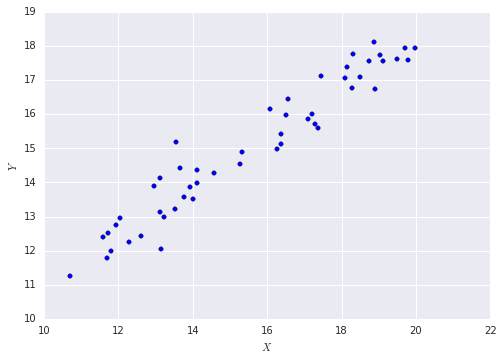

In [4]:
plt.scatter(x,y)
plt.xlabel("$X$")
plt.ylabel("$Y$");

In [5]:
from scipy.optimize import curve_fit

Write a function `fit`, that uses `curve_fit` and returns a fitted `(slope, intercept)` for the `X` and `Y` data above.

In [6]:
def fit(X, Y):
    """Fit X and Y data to the model Y ~ m*X + b and return (m,b)"""
    def line(x, a, b):
        return a * x + b
    mb,var_cov = (curve_fit(f=line,xdata=X,ydata=Y))
    return (mb[0],mb[1])

In [7]:
m, b = fit([0,1,2], [0,1,2])
assert abs(m-1.0)<0.01
assert abs(b-0.0)<0.01

Write a function, `bootstrap`, that can create boostrapped versions of the `X` and `Y` arrays above. It is important that you bootstrap pairs of `X[i],Y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [8]:
def bootstrap(X, Y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    X: ndarray
        Input X array.
    Y: ndarray
    
    Returns
    -------
    XX: ndarray
        The boostrapped X array with the same shape as X and correlated random samples
        drawn with replacement.
    YY: ndarray
        The bootstrapped Y array with the same shape as Y and correlated random samples
        drawn with replacement.
    """
    XX = np.random.choice(X,len(X),replace=True)
    YY = []
    for i in XX:
        j = (np.where(X==i)[0][0])
        YY.append(Y[j])
    return XX,YY

In [9]:
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [10]:
def bootstrap_fit(X, Y, n):
    """Fit a straight line to X and Y n times using bootstrapping.
    
    Returns
    -------
    (m, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the slope and intercept.
    """
    
    m = np.empty(n)
    b = np.empty(n)
    for i in range(n):
        x2,y2 = bootstrap(X,Y)
        m[i] = fit(x2,y2)[0]
        b[i] = fit(x2,y2)[1]
    return(m,b)

Using the original `X` and `Y` data above:

* Find the bootstrapped slopes and intercepts (bootstrap 100 times).
* Make an appropriately labeled `jointplot` of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

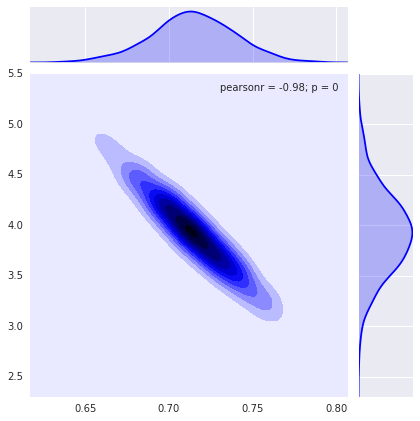

In [11]:
slope,intercept = bootstrap_fit(x,y,1000)
sns.jointplot(slope,intercept,color="blue",kind="kde");

In [12]:
print("Slope 95% CI: (",np.percentile(slope,2.5),",",np.percentile(slope,97.5),")")
print("Intercept 95% CI: (",np.percentile(intercept,2.5),",",np.percentile(intercept,97.5),")")

Slope 95% CI: ( 0.662523505475 , 0.761669203507 )
Intercept 95% CI: ( 3.17821245046 , 4.78479563518 )
